In [2]:
import numpy as np
import pandas as pd
import re
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm
import matplotlib.font_manager as fm
from matplotlib import rc
from konlpy.tag import Okt

In [4]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time
from bs4 import BeautifulSoup

In [5]:
font_name = fm.FontProperties(fname = 'C:\Windows\Fonts\HMFMPYUN.TTF').get_name()
rc('font',family=font_name)

In [54]:
driver = webdriver.Chrome(executable_path='./chromedriver.exe')
driver.execute_cdp_cmd("Page.addScriptToEvaluateOnNewDocument", {"source": """ Object.defineProperty(navigator, 'webdriver', { get: () => undefined }) """})
url = 'https://www.mk.co.kr/news/politics/view/2022/09/855006/'
driver.get(url)
time.sleep(4)
content_string = driver.find_element(By.CLASS_NAME,"art_txt").text

url = 'https://www.mk.co.kr/news/politics/view/2022/09/856059/'
driver.get(url)
content_string += driver.find_element(By.CLASS_NAME,"art_txt").text
content = content_string.replace('\n','')

C:\Users\big303\AppData\Local\Temp\ipykernel_6996\319340623.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path='./chromedriver.exe')


In [55]:
okt = Okt()
dataset = []
content = content.split('.')
print(content)
for i in range(len(content)):
    dataset.append(okt.nouns(re.sub('[^가-힣a-zA-Z\s]','',content[i])))
print(dataset)

['[사진 출처 = 연합뉴스]윤석열 대통령의 비속어 파문 동영상 녹취를 100번 이상 들어봤다', '사실 이런 저런 단어라는 사전정보가 없었다면, 그리고 아무런 선입견 없이 들었다면, 무슨 말인지 몰랐을듯하다주변이 시끄럽고 잡음도 많아 혼잣말 하듯 툭 던진 그 논란의 단어는 아무리 들어도 명확치 않았다', "다만 일부 언론과 더불어민주당이 주장하는 '바이든'이라는 선입견을 갖고 들으면 그렇게 들릴수도 있겠다 싶었다", "또 대통령실이 해명한 '날리면'으로 생각하고 들으면 그렇게 들릴수도 있겠다 싶은 정도였다", '머리속에 특정 단어를 담고 있으면 그렇게 들리는 각인효과 영향을 무시하기 힘들어 보인다', '보고 싶은 것만 보고 듣고 싶은것만 듣는 확증편향 오류도 강해보인다', "진영에 따라 한쪽에선 '바이든'이 확실하다고 하고, 다른 쪽에서는 '바이든'은 절대 아니라고 한다", '자신들이 원하는쪽으로 듣고 싶은대로 듣는것이다', "하여튼 반복해서 계속 들으니 '바이든''날리면'외에도 '말리면(믄)' '발리면(믄)'으로 들리기도 한다", '들으면 들을수록 정확히 어떤 단어를 쓴건지 100% 확신하기가 더 힘들어졌다', '내 귀가 이상한가 싶어 가족은 물론 주변 사람들에게도 "뭐가 들리는지" 물어봤다', '역시나 의견이 다 갈렸다', "결국 100% 확신을 갖고 '대통령이 말한 단어가 뭐다'라고 말하기 힘들다는게 정확한 팩트다", '이런점에서 대통령 발언을 최초 보도한 언론이 "(미국)국회에서 이 XX들이 승인 안 해주면 \'바이든\'이 쪽팔려서 어떡하나"는 자막을 넣어 보도한것 자체가 놀랍다', "사람마다 각자 다르게 들을 정도로 불명확한 단어를 무슨 배짱으로 '바이든'이라고 떡하니 단정적으로 명기했는지 이해하기 힘들다", '음성 전문가들조차 명확하게 알아듣지 못하는 단어를 더 잘 들을수 있는 초인적 능력을 가지고 있지 않다면 말이다', "더군다나 미국 입법부는 통상적으로 '국회'가 아닌 '의회'라고 칭한다", "그런데도 '국회'라는 말 앞에 친절하게 '(미국)'

           items   support                                 ordered_statistics  \
201    (대표, 이재명)  0.066667  [((), (대표, 이재명), 0.06666666666666667, 1.0), ((...   
118     (대통령, 것)  0.066667  [((), (대통령, 것), 0.06666666666666667, 1.0), ((것...   
174    (대통령, 미국)  0.066667  [((), (대통령, 미국), 0.06666666666666667, 1.0), ((...   
178    (대통령, 사실)  0.066667  [((), (대통령, 사실), 0.06666666666666667, 1.0), ((...   
172    (동맹, 대통령)  0.066667  [((), (대통령, 동맹), 0.06666666666666667, 1.0), ((...   
..           ...       ...                                                ...   
190    (대통령, 해결)  0.033333  [((), (대통령, 해결), 0.03333333333333333, 1.0), ((...   
191    (대통령, 확인)  0.033333  [((), (대통령, 확인), 0.03333333333333333, 1.0), ((...   
192    (훼손, 대통령)  0.033333  [((), (훼손, 대통령), 0.03333333333333333, 1.0), ((...   
193  (대통령실, 비속어)  0.033333  [((), (대통령실, 비속어), 0.03333333333333333, 1.0), ...   
303     (확인, 한미)  0.033333  [((), (확인, 한미), 0.03333333333333333, 1.0), ((한...   

     length  
201       2  

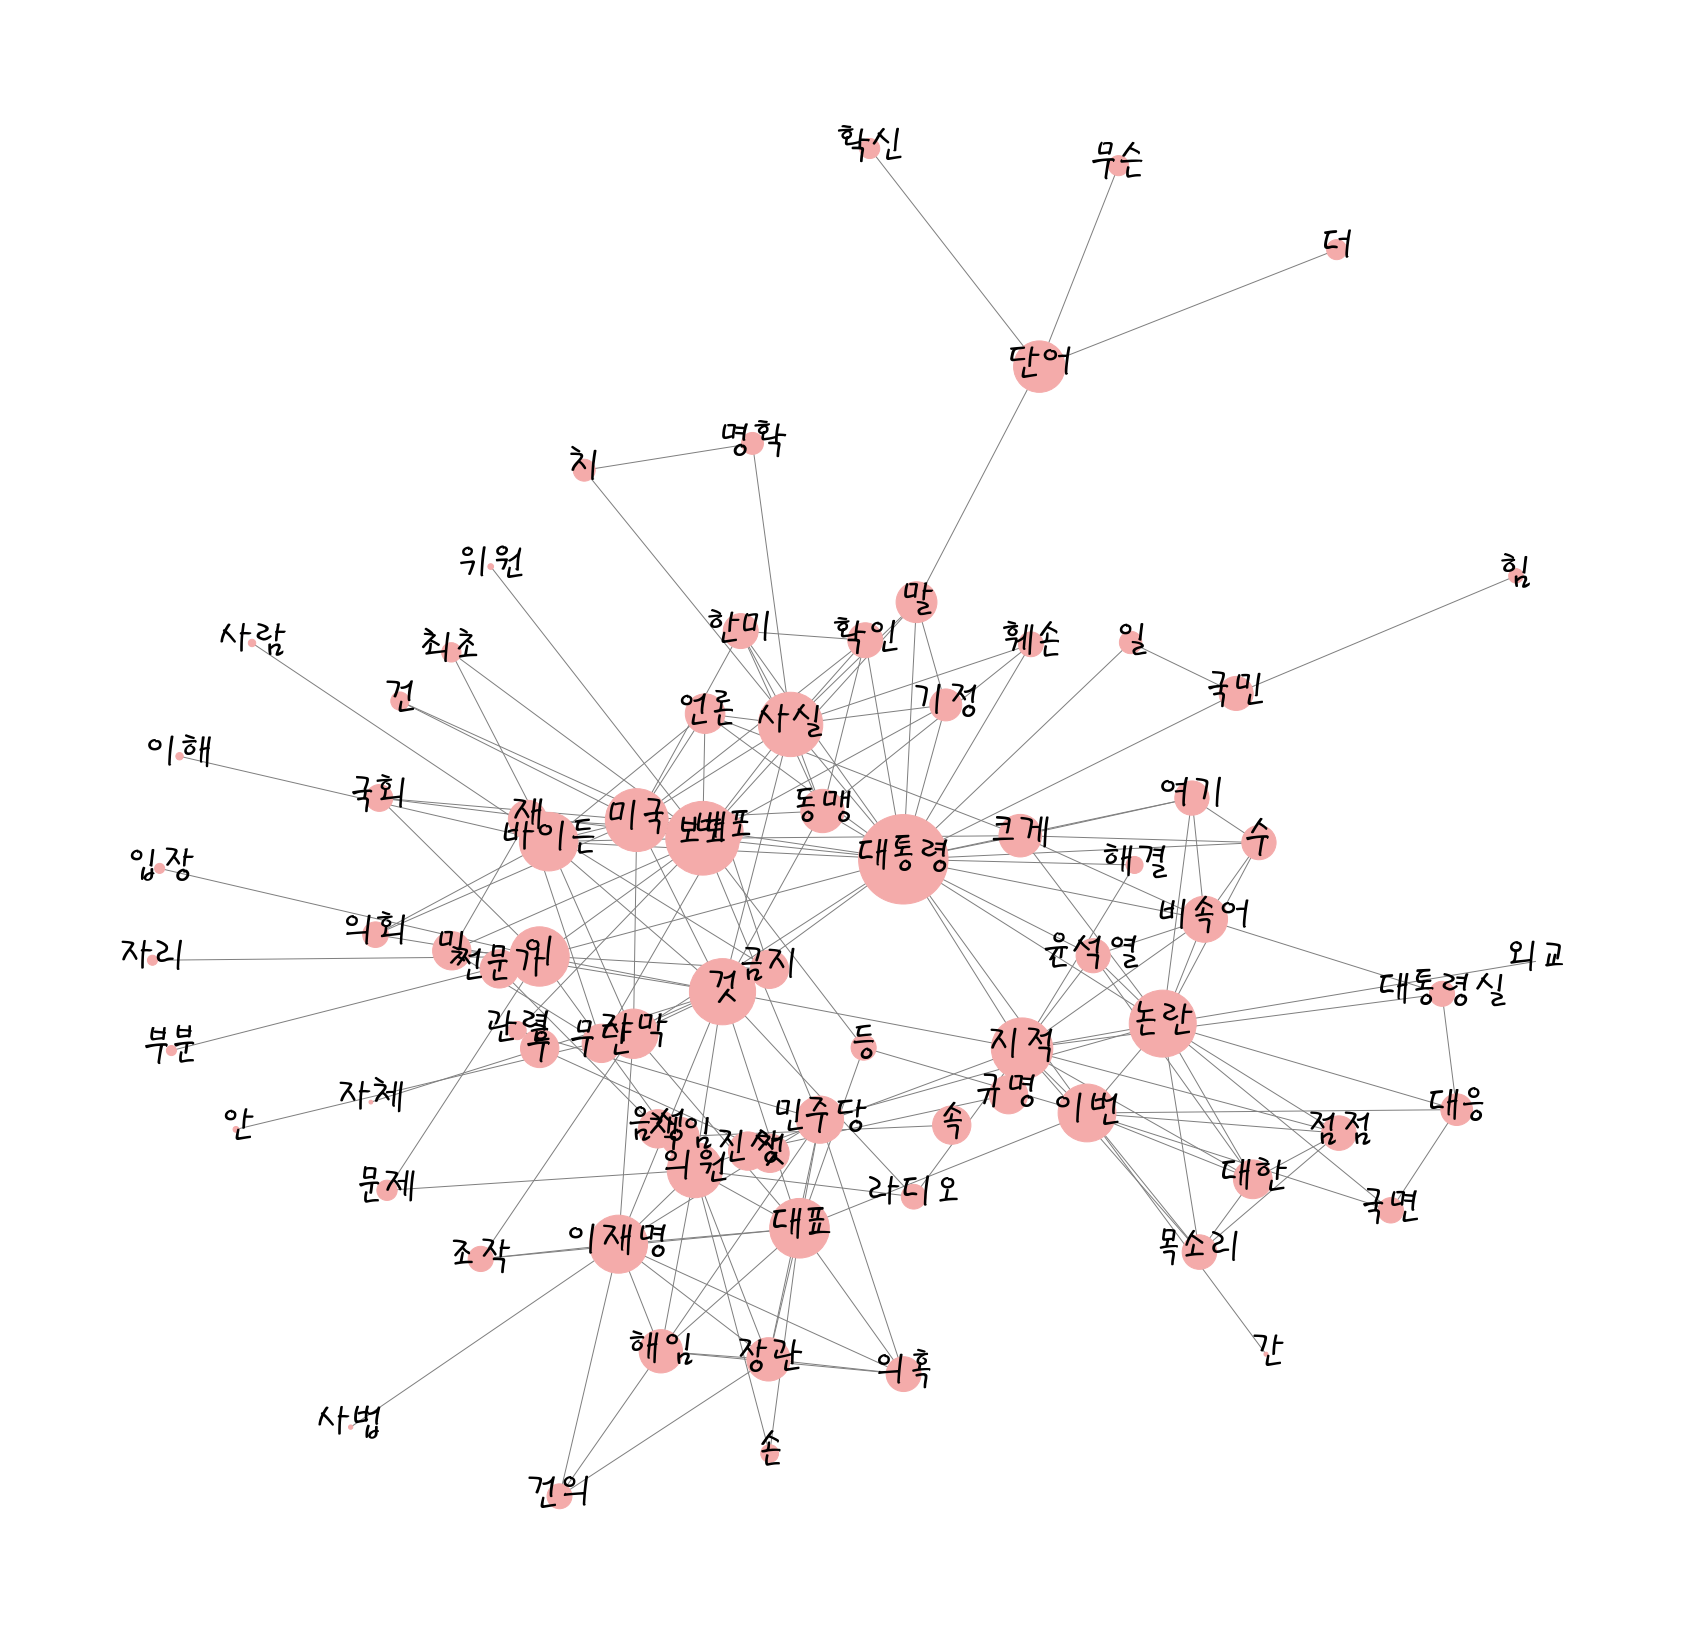

In [56]:
from apyori import apriori
result = (list(apriori(dataset, min_support=0.03)))
df = pd.DataFrame(result)
#print(df)

df['length'] = df['items'].apply(lambda x: len(x))
df = df[(df['length'] == 2) & (df['support'] >= 0.02)].sort_values(by='support',ascending = False)
print(df)
#df.head(10)
G = nx.Graph()
ar = (df['items'])
print(ar)
G.add_edges_from(ar)
pr = nx.pagerank(G)
#print(pr)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))
#pos = nx.spring_layout(G)
#pos = nx.circular_layout(G)
pos = nx.kamada_kawai_layout(G)
#pos = nx.spectral_layout(G)
#pos = nx.spiral_layout(G)
plt.figure(figsize=(30,30))
plt.axis('off')
nx.draw_networkx(G, font_family = font_name, font_size = 40,
                pos = pos,
                node_color = '#F4ABAA',
                node_size = nsize*4,
                alpha = 1,
                edge_color = '.5')
plt.savefig('net_img.png', bbox_inches='tight')
plt.show()

대통령 : 16
바이든 : 10
보도 : 11
[('대통령', 16), ('보도', 11), ('바이든', 10), ('단어', 9), ('의원', 8), ('사실', 7), ('민주당', 7), ('논란', 6), ('언론', 6), ('미국', 6), ('국민', 6), ('대한', 6), ('비속어', 5), ('대통령실', 5), ('국회', 5), ('사과', 5), ('이번', 5), ('이재명', 5), ('대표', 5), ('지적', 5), ('윤석열', 4), ('사람', 4), ('자막', 4), ('동맹', 4), ('조작', 4), ('연합뉴스', 3), ('의견', 3), ('의회', 3), ('기정', 3), ('크게', 3), ('우리', 3), ('사태', 3), ('대응', 3), ('부분', 3), ('야당', 3), ('위원', 3), ('관련', 3), ('외교', 3), ('장관', 3), ('해임', 3), ('목소리', 3), ('라디오', 3), ('정보', 2), ('선입견', 2), ('무슨', 2), ('주변', 2), ('명확', 2), ('다만', 2), ('정도', 2), ('보고', 2), ('다른', 2), ('자신', 2), ('확신', 2), ('발언', 2), ('최초', 2), ('자체', 2), ('이해', 2), ('음성', 2), ('전문가', 2), ('확인', 2), ('한미', 2), ('이처럼', 2), ('훼손', 2), ('행위', 2), ('자리', 2), ('적도', 2), ('대해', 2), ('진상', 2), ('규명', 2), ('입장', 2), ('책임', 2), ('불의', 2), ('무단', 2), ('배포', 2), ('금지', 2), ('여기', 2), ('건의', 2), ('의혹', 2), ('국면', 2), ('점점', 2), ('방송', 2), ('대변인', 2), ('국익', 2), ('라며', 2), ('사법', 2), ('해결', 2), ('국정', 2

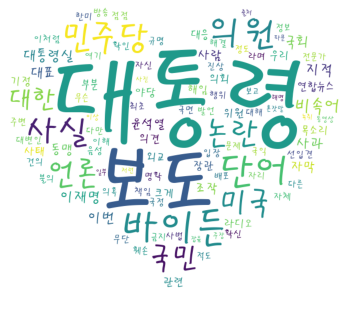

In [62]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

path = 'C:\Windows\Fonts\HMFMPYUN.TTF'
pos_word = okt.pos(content_string)
non_word = []
count_word = {}
for word, value in pos_word:
    if value == 'Noun':
        if len(word) > 1:
            non_word.append(word)
counts = Counter(non_word)
for key, value in counts.items():
    if value >= 10:
        print(key,':',value)

counts = Counter(non_word)
top_100 = counts.most_common(100)
print(top_100)
im = Image.open('heart.png').convert("RGBA") # 이미지 파일 읽어오기
mask_arr = np.array(im) # 픽셀 값 배열 형태 변환

wordcloud = WordCloud(font_path=path, background_color ='white',
                      width = 700, height = 700, mask = mask_arr,
                      prefer_horizontal = True).generate_from_frequencies(dict(top_100))

plt.figure(figsize = (6, 6))  
plt.imshow(wordcloud)

plt.axis('off')

plt.show()